In [ ]:
import numpy as np
import pandas as pd
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!gdown --id 1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9

Downloading...
From: https://drive.google.com/uc?id=1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9
To: /content/cats_and_dogs_filtered.zip
100% 68.6M/68.6M [00:00<00:00, 164MB/s]


In [ ]:
zip_ref = zipfile.ZipFile('/content/cats_and_dogs_filtered.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
base_dir = '/content/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

#training directory
train_cat_dir = os.path.join(train_dir, 'cats')
train_dog_dir = os.path.join(train_dir, 'dog')
#validation directory
valid_cat_dir = os.path.join(validation_dir, 'cats')
valid_dog_dir = os.path.join(validation_dir, 'dogs')

**MODEL**

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

#update image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)



#flow training image of batches size 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        class_mode='binary')
#flow validation image of batches 20 form test_datgen
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
100/100 - 51s - loss: 0.7007 - accuracy: 0.5305 - val_loss: 0.6807 - val_accuracy: 0.5060 - 51s/epoch - 512ms/step
Epoch 2/100
100/100 - 21s - loss: 0.6719 - accuracy: 0.5810 - val_loss: 0.6328 - val_accuracy: 0.6450 - 21s/epoch - 206ms/step
Epoch 3/100
100/100 - 22s - loss: 0.6535 - accuracy: 0.6125 - val_loss: 0.6082 - val_accuracy: 0.6710 - 22s/epoch - 222ms/step
Epoch 4/100
100/100 - 22s - loss: 0.6369 - accuracy: 0.6335 - val_loss: 0.5950 - val_accuracy: 0.6800 - 22s/epoch - 222ms/step
Epoch 5/100
100/100 - 22s - loss: 0.6269 - accuracy: 0.6385 - val_loss: 0.5837 - val_accuracy: 0.6990 - 22s/epoch - 222ms/step
Epoch 6/100
100/100 - 22s - loss: 0.6079 - accuracy: 0.6700 - val_loss: 0.5987 - val_accuracy: 0.6720 - 22s/epoch - 223ms/step
Epoch 7/100
100/100 - 22s - loss: 0.5973 - accuracy: 0.6760 - val_loss: 0.5670 - val_accuracy: 0.6920 - 22s/epoch - 222ms/step
Epoch 8/100
100/100 - 22s - loss: 0.5941 - accuracy: 0.6740 - val_loss: 0.5706 - val_accuracy: 0.6860 - 22s/epo

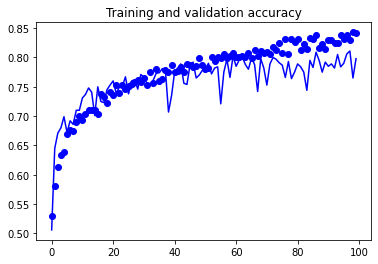

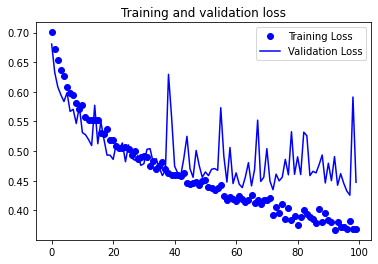

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()